## Taller 01 Kagle
##### Mary Yuliana Jaramillo - github.com/maryyuliana
##### Juan Fernando Gómez - github.com/HanisDad95

#### 1. Importar paquetes

In [74]:
import pandas as pd
import numpy as np
import scipy
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randint
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import *
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC

#### 2. Análsis Exploratorio de Datos

###### Cargue de datos

In [75]:
url = "https://github.com/HanisDad95/FundAnalitica2_2024_1/raw/master/df_test.parquet"

In [77]:
full_data= pd.read_parquet(url)
full_data.head(2)

,GENERO,ESTADO_CIVIL,FECHA_NACIMIENTO,CODIGO_SEDE,MULTI_CANCER,CESION,RIESGOS,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO,CANCER_OTRO_SITIO_FAMILIAR,CEREBRAL_FAMILIAR,FECHA_DATOS_PESO_TALLA,PESO,TALLA,FECHA_CONSULTA_TENSION,TSISTOLICA,TDIASTOLICA,Fecha_cero,mes_6,mes_5,mes_4,mes_3,mes_2,mes_1,valor_servicio,IV_NIVEL,HOSPI_NO_QUIRURGICA,URGENCIAS,HOSPITALIZACION,CITA_ONCOLOGICA,Biopsias_cancer,radioterapias_cancer,quimioterapias__cancer,hormonoterapias__cancer,cuidado_palitiavo__cancer,inmunoterapias_cancer,Citas_oncologicas_cancer,psiquiatria_cancer,psicologia_cancer,nutricion_cancer,atencion_nutricion
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4380,F,SO,1954-02-10,1007,None,0,4.0,0,0,0,0,2022-12-03,73.0,157.0,2022-12-03,130.0,80.0,2023-03-01,0.0,179130.0,136190.0,141727.0,83780.0,51928.0,592755.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,Una servicio nutricion
2998,F,CA,1958-06-17,2011,None,1,1.0,0,0,0,0,2023-02-27,61.0,155.0,2023-02-27,110.0,80.0,2023-03-01,0.0,0.0,0.0,0.0,0.0,85655.0,85655.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin servicios nutricion


##### Análisis de datos faltantes

In [78]:
full_data = pd.DataFrame(full_data)

In [59]:
full_data.dtypes

GENERO                                object
ESTADO_CIVIL                          object
FECHA_NACIMIENTO              datetime64[us]
CODIGO_SEDE                           object
MULTI_CANCER                          object
CESION                                object
RIESGOS                              float64
CANCER_MAMA_FAMILIAR                  object
CANCER_OTRO_SITIO                     object
CANCER_OTRO_SITIO_FAMILIAR            object
CEREBRAL_FAMILIAR                     object
FECHA_DATOS_PESO_TALLA        datetime64[us]
PESO                                 float64
TALLA                                float64
FECHA_CONSULTA_TENSION        datetime64[us]
TSISTOLICA                           float64
TDIASTOLICA                          float64
Fecha_cero                    datetime64[us]
mes_6                                float64
mes_5                                float64
mes_4                                float64
mes_3                                float64
mes_2     

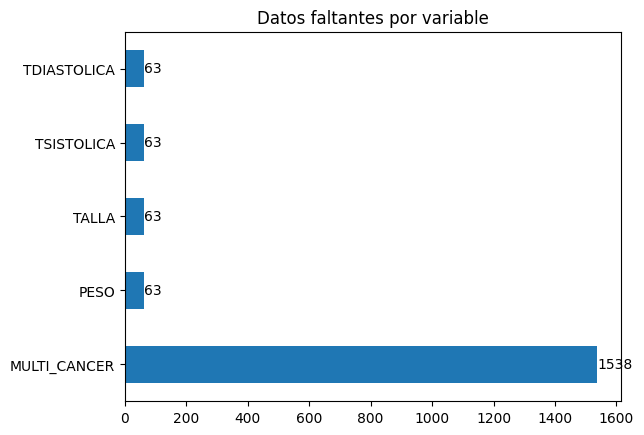

In [80]:
ax = full_data.loc[:,full_data.columns[full_data.isna().sum() > 0]].isna().sum().plot(kind = 'barh')
ax.bar_label(ax.containers[0])
plt.title('Datos faltantes por variable')
plt.show()

In [81]:
for i, j in full_data.isna().sum(axis = 1).value_counts().items():
    match i:
        case 0: 
            print(f'En el dataset hay {j} observaciones sin datos nulos.')   
        case _:
            print(f'En el dataset hay {j} observaciones con datos nulos o faltantes en {i} de sus variables.')

En el dataset hay 1476 observaciones con datos nulos o faltantes en 1 de sus variables.
En el dataset hay 150 observaciones sin datos nulos.
En el dataset hay 53 observaciones con datos nulos o faltantes en 5 de sus variables.
En el dataset hay 9 observaciones con datos nulos o faltantes en 3 de sus variables.
En el dataset hay 4 observaciones con datos nulos o faltantes en 4 de sus variables.
En el dataset hay 3 observaciones con datos nulos o faltantes en 2 de sus variables.


In [82]:
def ImputarCeros(data):
    # Creamos un imputador con la estrategia 'constant'
    VariableImputar = 'MULTI_CANCER'
    imputer = SimpleImputer(missing_values = None,strategy='constant', fill_value=0)
    
    # Separar las columnas en Parte1 (sin la variable a imputar) y Parte2 (solo la variable a imputar)
    Parte1 = data.drop(columns=VariableImputar)
    Parte2 = data[VariableImputar]
    
    # Imputar ceros en Parte1
    Parte2_imputed = pd.DataFrame(imputer.fit_transform(Parte2.values.reshape(-1, 1)), columns=[VariableImputar], index=Parte2.index)

    
    # Concatenar Parte2 con Parte1 imputado
    data_imputed = pd.concat([Parte1, Parte2_imputed], axis=1)
    
    return data_imputed

In [86]:
data_full2 = ImputarCeros(full_data).head(2)

In [88]:
data_full2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 4380 to 2998
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   GENERO                      2 non-null      object        
 1   ESTADO_CIVIL                2 non-null      object        
 2   FECHA_NACIMIENTO            2 non-null      datetime64[us]
 3   CODIGO_SEDE                 2 non-null      object        
 4   CESION                      2 non-null      object        
 5   RIESGOS                     2 non-null      float64       
 6   CANCER_MAMA_FAMILIAR        2 non-null      object        
 7   CANCER_OTRO_SITIO           2 non-null      object        
 8   CANCER_OTRO_SITIO_FAMILIAR  2 non-null      object        
 9   CEREBRAL_FAMILIAR           2 non-null      object        
 10  FECHA_DATOS_PESO_TALLA      2 non-null      datetime64[us]
 11  PESO                        2 non-null      float64       
 1

In [28]:
ax = full_data['Target'].value_counts(normalize = True).plot(kind = 'bar')
labels = (full_data.Target.value_counts(normalize = True).sort_index()*100).round(1).astype('str') + '%' 
ax.tick_params(axis = 'x', rotation = 0)
ax.set_title("Categorías variable dependiente, conjunto de prueba")
ax.set_yticks([])
for container in ax.containers:
    ax.bar_label(container, labels = labels)
ax.set_title('Distribución de la variable respuesta')
plt.show()

KeyError: 'Target'

In [ ]:
full_data.groupby(['ESTADO_CIVIL','Target'])['GENERO'].count().plot(kind = 'bar')
ax.tick_params(axis = 'x', rotation = 0)
ax.set_title("Categorías variable dependiente, conjunto de prueba")
ax.set_title('Distribución de la variable respuesta')
plt.show()

In [ ]:
## Se define una función para obtener el índice de las variables categóricas, numéricas y variable objetivo
def SepararNumCate(df : pd.DataFrame, target_variable : str):
    '''Returns a triplet with column names (numerical, categorical, target)
    '''
    numerical = df.select_dtypes(include = 'number').columns.to_list()
    date_time = df.select_dtypes(include = 'datetime').columns.to_list()
    categorical = df.select_dtypes(include = 'object').columns.to_list()
    numerical.remove(target_variable) ## REMOVES THE TARGET VARIABLE
    target = df[target_variable].copy()
    return numerical, date_time, categorical, target


num_idx, date_time_idx, categ_idx, target_idx = SepararNumCate(full_data,'Target')

In [ ]:
full_data.select_dtypes(include = 'datetime')

In [ ]:
categ_idx

In [ ]:
full_data.loc[:,num_idx].describe().T

#### OUTLIERS UNIVARIADOS

In [ ]:
full_data[full_data.isna().sum(axis = 1) == 1]

In [ ]:
for i in num_idx:
    plt.figure()
    plt.title(i)
    plt.boxplot(train_set[i], vert = False)

#### OUTLIERS MULTIVARIADOS

In [ ]:
sns.boxplot(y = full_data.loc[:,['mes_6', 'mes_5', 'mes_4', 'mes_3', 'mes_2', 'mes_1',]].agg('sum', axis = 1), x = full_data['Target'])
plt.show()

In [ ]:
full_data.loc[:,['GENERO','Target']].value_counts()

In [ ]:
full_data.loc[full_data['GENERO']=='M',['GENERO','Target']].value_counts(normalize = True)

### PIPELINES DE FEATURE ENGINEERING

In [ ]:
### AQUÍ VAN TODAS LAS VARIABLES NUEVAS QUE SE VAN A CREAR
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Perform arbitary transformation
        X['IMC'] = X['PESO']/X['TALLA'] ### HACER UNA MEJOR CONSTRUCCIÓN DE ESTA VARIABLE QUE TOME EN CUENTA LA EDAD
        X['SumCosto'] = X.loc[:,['mes_6', 'mes_5', 'mes_4', 'mes_3', 'mes_2', 'mes_1',]].agg(sum, axis = 1) ### 
        X['EdadComplicacion'] = (((X['Fecha_cero'] - X['FECHA_NACIMIENTO']).dt.components.days)/365).astype(int)

        
        X.drop(labels = 'Fecha_cero', axis = 1, inplace = True) ## IMPORTANTE ESTE PASO PARA QUE NO VAYAMOS A DEJAR ESTA VARIABLE
        return X


### TRAIN TEST SPLIT

In [ ]:
full_data.groupby(['GENERO','Target']).apply(lambda x : x.sample(frac = 0.9, random_state = 123))

In [ ]:
train, test = train_test_split(full_data,test_size=0.1,stratify = full_data[['Target','GENERO']], shuffle = True, random_state = 123) ## IMPORTANTE MIRAR POR CUALES VARIABLES SE DEBE ESTRATIFICAR

### IMPUTATION AND STANDARDIZATION PIPELINES ==

In [ ]:
### Pipelines for standardization

num_stand = Pipeline(steps = [
    ('numScaler',StandardScaler())
])

categ_stand = Pipeline(steps = [
    ('categStand',OneHotEncoder(handle_unkown = 'ignore'))
])

columnScaler = ColumnTransformer(transformers = 
    [('numScaler',num_stand,num_idx),
     ('categStand', categ_stand, categ_idx)],
     remainder = 'drop'
    )

### Pipelines for imputation

num_imp = Pipeline(steps = [
    ('numerical_imputer',SimpleImputer(strategy = 'median'))
])

cat_imp = Pipeline(steps = [
    ('categorical_imputer',SimpleImputer(strategy = 'most_frequent'))
])

columnImputer = ColumnTransformer(transformers = 
    [('NumericalImputer',num_imp,num_idx),
     ('CategoricalImputer',cat_imp, categ_idx)

    ],
remainder = 'passthrough')

In [ ]:
def SVC(kernel, gamma, C, degree, coef0, tol):
    kernel = int(kernel) ## (0,3)
    n_jobs = -3 ## to use all but 2 cores.
    kernels = ['linear','polynomial','rbf','sigmoid']
    # match kernel:
    #     case 2:
    #         # use gamma : must be non-negative
    #     case _:
    #         # dont use gamma
    classificator = SVC(C = C, kernel = kernels[kernel], class_weight = )
    return -np.median(cross_val_score(classificator, x_train, y_train, n_jobs = n_jobs, cv = 5, scoring = 'f1'))

In [ ]:
pbounds = {
    
}